## Exercise 1 - Univariate linear regression

In [39]:
import numpy as np
import pandas as pd

### 1. Warmup - create 5 x 5 identity matrix

In [40]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### 2. Linear regression with one variable - univariate

You are CEO of a food truck business.  You have data for populations and profits in different cities.  You want to run a linear regression on this data.  
Data resides in `ex1data1.txt`, column 1 = population, column 2 = profits (or loss)

In [41]:
df = pd.read_table('ex1data1.txt', sep=',', header=None, names=['pop', 'profit'])

In [42]:
df.head()

,pop,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [43]:
df[['profit']].sample(20)

,profit
23,5.18750
47,1.84400
24,3.08250
40,0.55657
74,-2.68070
9,3.81660
66,5.74420
29,24.14700
85,4.24150
43,2.44060


In [44]:
df[['profit']].describe()

,profit
count,97.000000
mean,5.839135
std,5.510262
min,-2.680700
25%,1.986900
50%,4.562300
75%,7.046700
max,24.147000


97 examples, mean, std, range

What's best guess of profit of a new business?  

* Range is -2.7 to 24.1.  
* Mean is 5.8.  
* Median (50th %ile) is 4.6.

If you were given the population, would that change your guess?  

([<matplotlib.axis.XTick at 0x1082c8a20>,
 <a list of 8 Text xticklabel objects>)

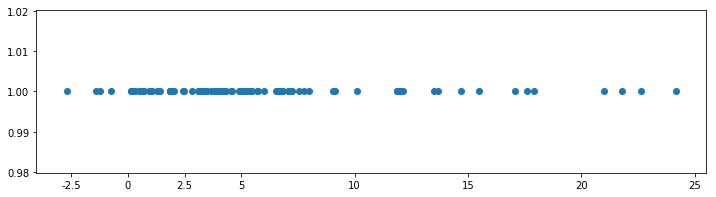

In [45]:
o = np.ones(len(df))
plt.figure(figsize = (12,3))
plt.scatter(df['profit'], o)
plt.xticks([-2.5, 0, 2.5, 5, 10, 15, 20, 25],(-2.5, 0, 2.5, 5, 10, 15, 20, 25))

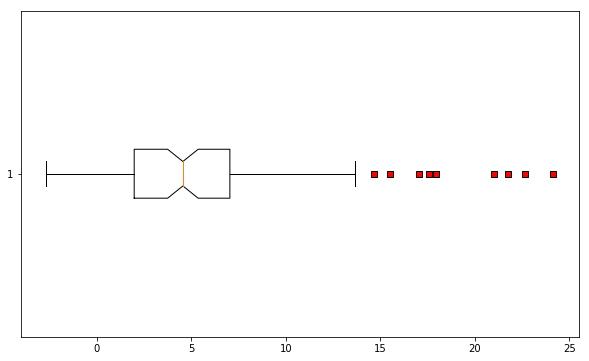

In [46]:
plt.figure(figsize = (10,6))
red_square = dict(markerfacecolor='r', marker='s')
plt.boxplot(df['profit'], vert=False, notch=True, flierprops=red_square);

In [48]:
df.sample(20)

,pop,profit
74,5.0269,-2.68070
96,5.4369,0.61705
32,9.2482,12.13400
10,5.7107,3.25220
89,5.0594,2.82140
6,7.4764,4.34830
15,5.3794,3.51290
65,7.2182,4.88520
3,7.0032,11.85400
40,5.4069,0.55657


In [49]:
df.describe()

,pop,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Correlation, profit depends on population?

### 2.1 Plotting the data

In [50]:
import matplotlib
import matplotlib.pyplot as plt

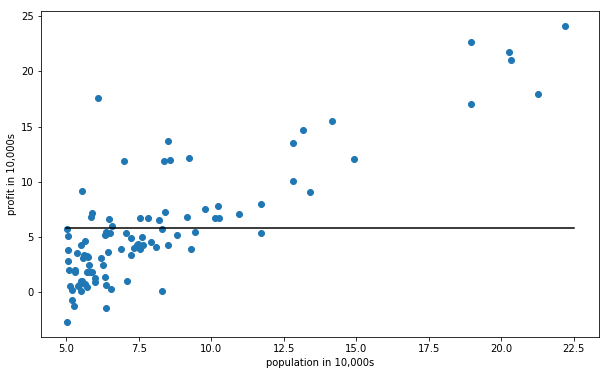

In [51]:
plt.figure(figsize = (10,6))
plt.scatter(df['pop'], df.profit)
plt.xlabel('population in 10,000s')
plt.ylabel('profit in 10,000s')
plt.plot((5,22.5), (5.84, 5.84), 'black')


### 2.2 Linear Regression and Gradient descent

#### Hypothesis function $H_\theta(x)$

In Linear Regression, the goal is to fit the best line to our data points so we may then use that line to predict a profit for a given population.  

Many lines can be fit, which one is the best?

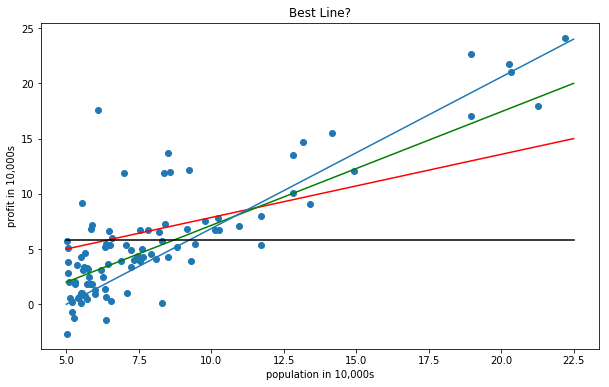

In [52]:
# Plot of possible regression lines
plt.figure(figsize = (10,6))
plt.scatter(df['pop'], df.profit)
plt.xlabel('population in 10,000s')
plt.ylabel('profit in 10,000s')
plt.plot((5,22.5), (5,15), 'r')
plt.plot((5,22.5), (2,20), 'g')
plt.plot((5,22.5), (0, 24))
plt.plot((5,22.5), (5.84, 5.84), 'black')
plt.title('Best Line?');


something here about equation of a line y = mx + b, leading into H = theta@x  

Also, that the line becomes our predictor function.  Someone gives us a population and we predict a profit from the line.

In machine learning this linear prediction function is called the Hypothesis function and takes the form  
$H_\theta(x) = \theta_0 + \theta_1 x$

This is the familiar equation of a line where  
$\theta_0$ is the line's y-intercept and  
$\theta_1$ represents the line's slope   

The hypothesis function $H_\theta(x)$ contains the $\theta$ subscript as an indicator that the function depends on our choice of $\theta_0$ and $\theta_1$.  

One choice of $\theta$s will define a different line and predict a different profit for a given population than another pair of $\theta$s.  

We want to choose $\theta$s to best fit our $m$ data points.

#### Cost function $J_\theta(x)$

What do we mean best fit?  How do we define what the best line is?

We can use our eyes and may be able to see that one is better than another.  But it would be better if we could come up with a quantitative measure.

In linear regression, the best line is the line that minimizes the sum of the squares of the vertical distances between the line and each data point.  

graph showing about 5 points and a line and the vertical distance

For a point $(x_k, y_k)$, the vertical distance between the line and this point is $H_\theta(x_k) - y_k$  

labeled graph showing why this is true, point's vertical height is yk, line's is H(x)

We'll use the term _Cost_ to represent the sum of the squared differences.  
The goal will be to fit a line that minimizes the Cost.

A poor choice of $\theta$s will result in a line that has large distances between itself and the data points and therefore a large Cost.  A good choice of $\theta$s will result in a line that has a small Cost.  

We will define the Cost function $J_\theta(x)$ as $$J_\theta(x) = \frac{1}{2m} \sum_{i=1}^m (H_\theta(x_i) - y_i)^2$$


let's pick this apart, start inside the parens, that's just the distance.  Square it so negative distances don't cancel out positive distances.  Explain that the Sigma sums the distances for all of the points.  Divide by m results in an average cost.

This is just the sum of the squared differences divided by $2m$.  

We divide by $m$ (the number of data points, a constant) to express the Cost in terms of the average squared distance.  

We also divide by 2 just for mathematical convenience later in the process.  
This is allowed because all we are trying to do with $J$ is to find parameters $\theta_0$ and $\theta_1$ that minimize $J$.  
If this set of $\theta$s minimizes $J$, it also minimizes $\frac{1}{2}J$.




Making use of the fact that $$H_\theta(x_i) = \theta_0+\theta_1x_i$$ we expand the Cost function to

$$J_\theta(x) = \frac{1}{2m} \sum_{i=1}^{m} (\theta_0 + \theta_1x_i - y_i)^2$$

#### 2.2.1 Gradient descent - Updating $\theta$s

In order to minimize the Cost associated with the points in our data set, we will seek out the pair of $\theta$s that minimize $J$.  

We'll do so by iteratively adjusting the $\theta$s in a way that continually decreases $J$. 

This process is known as _gradient descent_.

Gradient descent finds the minimum of cost function $J$ by descending the Cost  gradient.   


The logic goes like this:  
choose step size $\alpha$--this defines how big a step you take in each iteration  
choose number of iterations to use  
start with initial guesses for $\theta_0$ and $\theta_1$  
calculate inital cost, $J$, based on this pair of $\theta$s  
Loop for the number of iterations
* adjust $\theta$s **simultaneously**  
* calculate new cost, J  
* optionally, stop when the change in J is small enough for your desired level of precision


#### Updating $\theta$ equations

Within the loop, each $\theta$ is updated by subtracting the partial derivative of $J$ with respect to each $\theta$ multiplied by the chosen step size, $\alpha$  

(** Here is the step that motivated defining $J$ with the division by 2.  When the partial derivatives are taken, the $\frac{1}{2}$ term cancels with the 2 from the exponent.)

$\theta_0 := \theta_0 - \frac{\alpha}{m}\sum_{i=1}^{m}(\theta_0 + \theta_1x_i - y_i)$

$\theta_1 := \theta_1 - \frac{\alpha}{m}\sum_{i=1}^m(\theta_0 + \theta_1x_i - y_i)x_i$

short diversion showing gradient descent in 1 variable, with curve.  When derivative large, steps are large, when derivative gets close to 0, steps become small.  Show how it works from greater than minimum and lesser than minimum.

With each iteration, each $\theta$ gets closer to its optimal value and $J$ becomes smaller.

### Code

#### Load the data

In order to take advantage of NumPy's vectorized multiplication, we are going to introduce an $x_0$ term that always equals 1.  So, for every data point we will have $x_0 = 1$, $x_1=$ population value, $y=$ profit value

y = theta0 + theta1 \* x1 is equivalent to  
y = theta0 \* 1 + theta1 \* x1  
so if we define x0 = 1 for every m then we can say
y = theta0 \* x0 + theta1 \* x1

This enables us to use the vector formula y = theta \* x  
without having to worry about 0 and 1 subscripts.  
Otherwise it would be y = theta0 + theta1 \* x

In [53]:
#  create NumPy arrays
x1 = np.array((df['pop']))  # load population vector from DataFrame into array x1
x0 = np.ones(len(x1))  # load 1's into x0
X = np.column_stack((x0, x1))  # create 2D array, m x 2, of x0 and x1

X[:5] # first 5 elements of X

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [74]:
# initialize variables
m = len(X)  # number of examples
alpha = 0.01  # gradient descent step size
iterations = 10000
theta = np.array([0.0, 0.0])  # intialize theta values
J = np.zeros(iterations)  # initialize array to store successive cost calculations

In [58]:
# define function to calculate J based on 
# m = number of examples
# X = m x 2 matrix of 1s and population values
# y = m length array of profit values
# theta = array of length 2

def calculateCost(m, X, y, theta):
    J = 1/(2*m) * np.square(X @ theta - y).sum()
    return J

In [59]:
calculateCost(m, X, y, (0,0))

32.072733877455676

In [75]:
for i in range(iterations):
    
    J[i] = calculateCost(m, X, y, theta)
    
    # It's necessary to update the elements of theta simultaneously,
    # can't first update theta[0] and then use this new value to 
    # calculate the update to theta[1], hence the use of the temp
    # variables.
       
    
    #   dimensions              97x2   2x1   97x1
    temp0 = theta[0] - alpha/m * (X @ theta - y).sum()
    temp1 = theta[1] - alpha/m * ((X @ theta - y) * X[:,1]).sum()
    
    theta[0] = temp0
    theta[1] = temp1
    # print(theta)


print("theta[0] is {:.6f} and theta[1] is {:.6f}".format(theta[0], theta[1]))
print("cost is {:.6f}".format(J[iterations-1]))

theta[0] is -3.895781 and theta[1] is 1.193034
cost is 4.476971


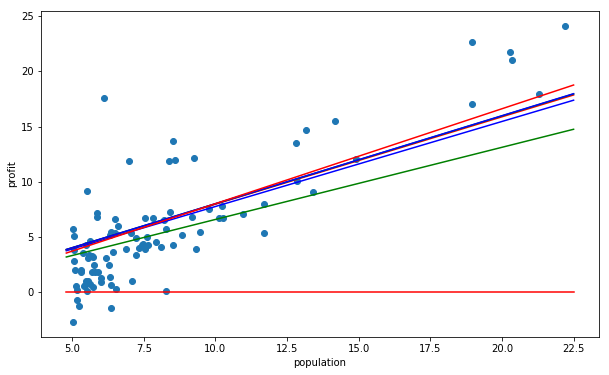

In [36]:
# plot the regression line based on the calcuated theta[0] (y-intc) and theta[1] (slope)

plt.figure(figsize = (10,6))
plt.scatter(df['pop'], df.profit)
plt.xlabel('population')
plt.ylabel('profit')
#plt.plot((4.8,22.5), (theta[1] * 4.8 + theta[0], theta[1] * 22.5 + theta[0]), 'r');
plt.plot((4.8,22.5), (0 * 4.8 + 0, 0 * 22.5 + 0), 'r'); # start with theta = (0,0)
plt.plot((4.8,22.5), (0.653288 * 4.8 + 0.058391, 0.653288 * 22.5 + 0.058391), 'g'); # 1 iteration
plt.plot((4.8,22.5), (0.77001 * 4.8 + 0.062892, 0.77001 * 22.5 + 0.062892), 'b'); # 2 iterations
plt.plot((4.8,22.5), (0.791348 * 4.8 + 0.057823, 0.791348 * 22.5 + 0.057823), 'r'); # 3 iterations
plt.plot((4.8,22.5), (0.79573 * 4.8 + 0.051064, 0.79573 * 22.5 + 0.051064), 'g'); # 4 iterations
plt.plot((4.8,22.5), (0.797096 * 4.8 + 0.044014, 0.797096 * 22.5 + 0.044014), 'b'); # 5 iterations
plt.plot((4.8,22.5), (0.859582 * 4.8 -0.576556, 0.859582 * 22.5 - 0.576556), 'r'); # 100 iterations

### Post Analysis

In [76]:
s, b = np.polyfit(x1, y, 1)  # numpy routine fits best 1st degree polynomial through data pts, returns slope, y intcpt
print("b is {:.6f} and theta[0] is {:.6f}".format(b, theta[0]))
print("s is {:.6f} and theta[1] is {:.6f}".format(s, theta[1]))

b is -3.895781 and theta[0] is -3.895781
s is 1.193034 and theta[1] is 1.193034


In [77]:
(theta[1] - s)/s  # close to our theta[1]?

-4.887633080424952e-09

In [78]:
(theta[0] - b)/b  # close to our theta[0]?

-1.4899097753583193e-08

In [79]:
cost = calculateCost(m, X, y, (b,s))
cost

4.476971375975179

In [80]:
costDiff = (J[iterations-1] - cost)/cost  # close to our minimum cost?
print("percentage cost difference = {:.6%}".format(costDiff))

percentage cost difference = 0.000000%


### Plot J against iterations

How many iterations were required to reduce $J$?

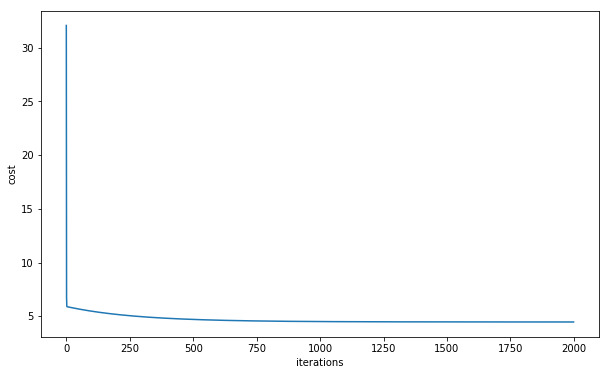

In [738]:
plt.figure(figsize = (10,6))
plt.plot(range(iterations), J)
plt.xlabel('iterations')
plt.ylabel('cost');


$J$ does not move much in the neighborhood of the last 5 iterations

In [81]:
J[-5:]

array([4.47697138, 4.47697138, 4.47697138, 4.47697138, 4.47697138])

In [38]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Plot the Cost surface, $J$, vs. $\theta_0$ and $\theta_1$

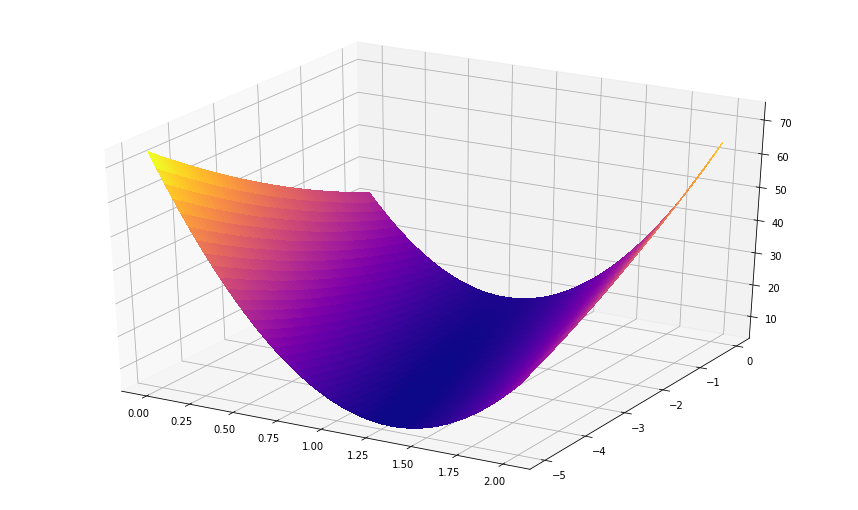

In [40]:
fig = plt.figure(figsize=(15,9))
ax = fig.gca(projection='3d')

# Grid over which we will calculate J
theta1_vals = np.linspace(-5, 0, 100)
theta0_vals = np.linspace(0, 2, 100)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = (theta1_vals[i], theta0_vals[j])
        J_vals[i,j] = calculateCost(m, X, y, t)

theta0_vals, theta1_vals  = np.meshgrid(theta0_vals, theta1_vals)

surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap=cm.plasma,
                       linewidth=0, antialiased=False)